In [91]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression

import numpy as np

In [92]:
df = pd.read_csv(r'E:/INTERN/OIBSIP/IRIS FLOWER PREDICTION/Iris.csv')

In [93]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- sepal  length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- species it's class and it's the target column


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [96]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

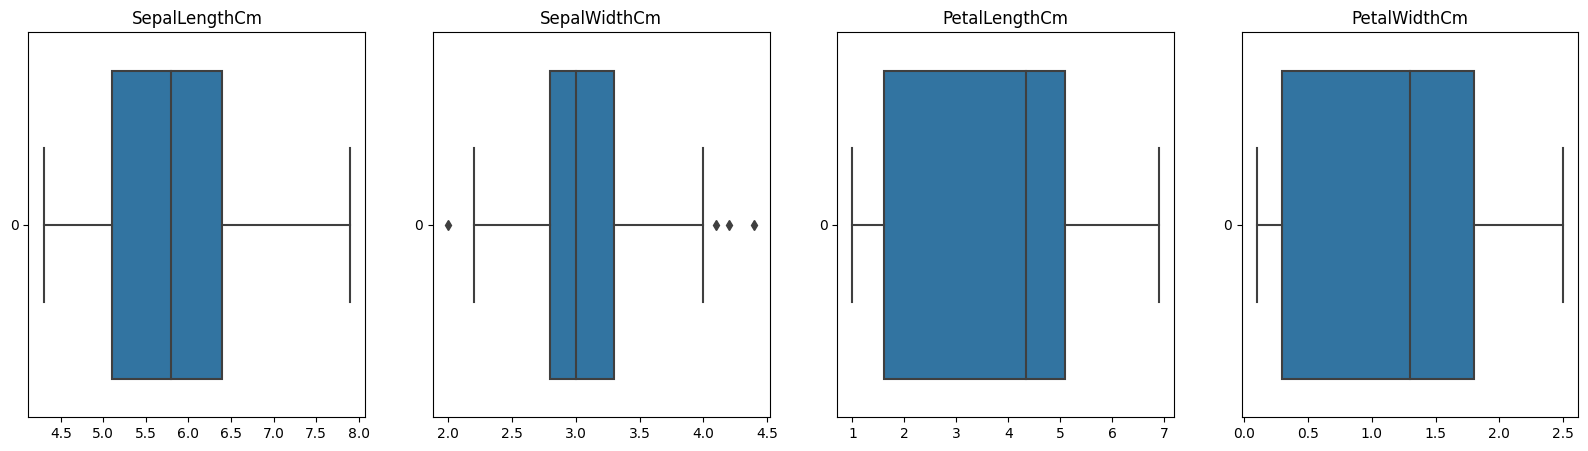

In [97]:
l = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(20,5))

for i , j in enumerate(l):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[j], orient='h')
    plt.title(j)

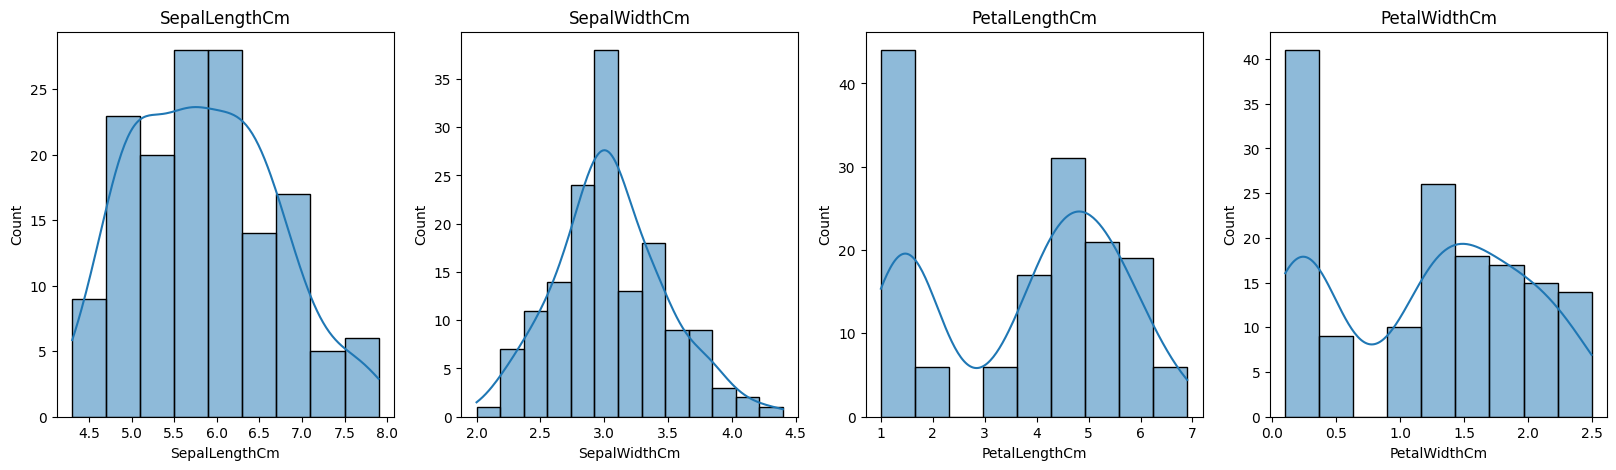

In [98]:
l = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(20,5))

for i , j in enumerate(l):
    plt.subplot(1,4,i+1)
    sns.histplot(df, x=j, kde=True)
    plt.title(j)

In [99]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [100]:
df[l].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

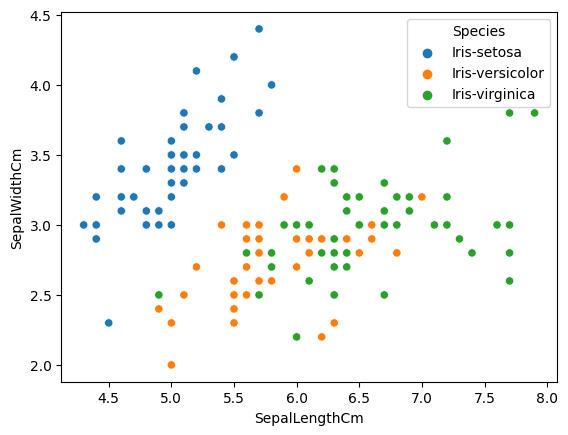

In [101]:
sns.scatterplot(df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

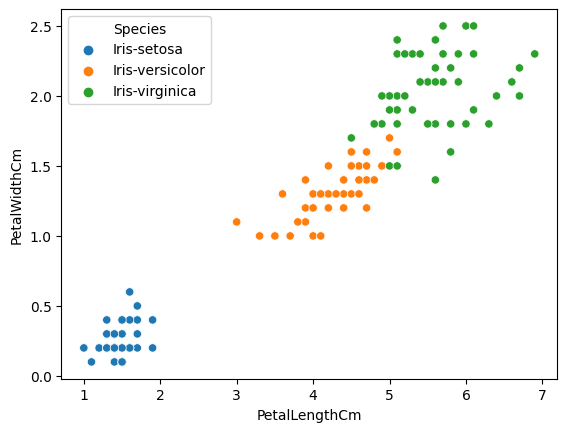

In [102]:
sns.scatterplot(df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

In [103]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [104]:

label = LabelEncoder()
stan= StandardScaler()

In [105]:
df['Species']  = label.fit_transform(df['Species'])

In [106]:
x = df.drop(columns='Species')
y = df['Species']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=10)

In [108]:
lor = LogisticRegression()

In [109]:
lor.fit(x_train, y_train)

c:\Users\JOHNNY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
y_pred = lor.predict(x_test)
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

In [111]:
lor.score(x_test,y_test)

1.0

In [112]:
accuracy_score(y_test, y_pred)

1.0

In [113]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

# check the result 


In [114]:
pd.DataFrame({"original":y_test, "predicted":y_pred})

,original,predicted
87,1,1
111,2,2
10,0,0
91,1,1
49,0,0
60,1,1
72,1,1
67,1,1
39,0,0
55,1,1
